# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

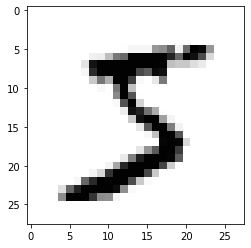

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [7]:
0/255

0.0

In [8]:
128/255

0.5019607843137255

In [9]:
255/255

1.0

In [10]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [14]:
np.mean(X_train)

0.13066062

In [11]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [16]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [13]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [44]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [22]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [24]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [ ]:
len(weights[0])

300

In [ ]:
28*28

784

In [37]:
300*784

235200

In [30]:
weights.size

235200

In [17]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [34]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [45]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [36]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [38]:
X_train.shape

(50000, 28, 28)

In [36]:
50000/128

390.625

In [46]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1860 - accuracy: 0.7175 - val_loss: 0.5807 - val_accuracy: 0.8669
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.5070 - accuracy: 0.8724 - val_loss: 0.3906 - val_accuracy: 0.8978
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.3963 - accuracy: 0.8922 - val_loss: 0.3320 - val_accuracy: 0.9103
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3492 - accuracy: 0.9023 - val_loss: 0.3029 - val_accuracy: 0.9146
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3203 - accuracy: 0.9087 - val_loss: 0.2815 - val_accuracy: 0.9231
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2990 - accuracy: 0.9152 - val_loss: 0.2648 - val_accuracy: 0.9266
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2822 - accuracy: 0.9200 - val_loss: 0.2524 - val_accuracy: 0.9280
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [47]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0810 - accuracy: 0.9780 - val_loss: 0.1023 - val_accuracy: 0.9729
Epoch 2/10
782/782 [==============================] - 4s 4ms/step - loss: 0.0782 - accuracy: 0.9784 - val_loss: 0.1026 - val_accuracy: 0.9715
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0750 - accuracy: 0.9795 - val_loss: 0.1019 - val_accuracy: 0.9718
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0724 - accuracy: 0.9805 - val_loss: 0.0974 - val_accuracy: 0.9738
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0696 - accuracy: 0.9810 - val_loss: 0.0954 - val_accuracy: 0.9738
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0673 - accuracy: 0.9816 - val_loss: 0.1031 - val_accuracy: 0.9717
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0648 - accuracy: 0.9824 - val_loss: 0.0928 - val_accuracy: 0.9740
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [48]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.1859692335128784,
  0.5069994926452637,
  0.39630937576293945,
  0.3492262363433838,
  0.3203447163105011,
  0.29897820949554443,
  0.28217393159866333,
  0.26784852147102356,
  0.255327045917511,
  0.24418242275714874,
  0.23375365138053894,
  0.22444939613342285,
  0.21574710309505463,
  0.20738495886325836,
  0.20019105076789856,
  0.1930452287197113,
  0.18660426139831543,
  0.18034620583057404,
  0.17464445531368256,
  0.16905196011066437,
  0.16379877924919128,
  0.15905241668224335,
  0.1541764885187149,
  0.1498381644487381,
  0.145802304148674,
  0.1417047083377838,
  0.13774555921554565,
  0.1342826634645462,
  0.13063360750675201,
  0.1273318976163864,
  0.12416905164718628,
  0.12123338878154755,
  0.11813952773809433,
  0.11537767946720123,
  0.11263887584209442,
  0.11017222702503204,
  0.10743983089923859,
  0.10502789914608002,
  0.10274507105350494,
  0.10051612555980682,
  0.0982661023736,
  0.09616901725530624,
  0.09414422512054443,
  0.09227275103330612

In [42]:
history.history

{'loss': [0.06225531920790672,
  0.06138444319367409,
  0.06027477979660034,
  0.059108540415763855,
  0.058218587189912796,
  0.05721678584814072,
  0.05623963847756386,
  0.055387239903211594,
  0.05441601574420929,
  0.05352767929434776,
  0.052592288702726364,
  0.051786866039037704,
  0.05093264952301979,
  0.05003897473216057,
  0.0492832325398922,
  0.04847511276602745,
  0.04775787517428398,
  0.04693999141454697,
  0.046214886009693146,
  0.045556679368019104,
  0.04481605067849159,
  0.04405045881867409,
  0.04339233413338661,
  0.04278245195746422,
  0.042025357484817505,
  0.041410598903894424,
  0.040810007601976395,
  0.04007289931178093,
  0.03942100703716278,
  0.03892222046852112],
 'accuracy': [0.9837200045585632,
  0.9840800166130066,
  0.983959972858429,
  0.9847999811172485,
  0.9847999811172485,
  0.9850999712944031,
  0.9853399991989136,
  0.9857400059700012,
  0.986020028591156,
  0.9861599802970886,
  0.9864799976348877,
  0.9866200089454651,
  0.98703998327255

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.185969,0.71750,0.580700,0.8669
1,0.506999,0.87242,0.390600,0.8978
2,0.396309,0.89220,0.331955,0.9103
3,0.349226,0.90234,0.302923,0.9146
4,0.320345,0.90868,0.281495,0.9231
5,0.298978,0.91518,0.264784,0.9266
6,0.282174,0.92004,0.252360,0.9280
7,0.267849,0.92370,0.243314,0.9307
8,0.255327,0.92746,0.233507,0.9346
9,0.244182,0.93136,0.223619,0.9368


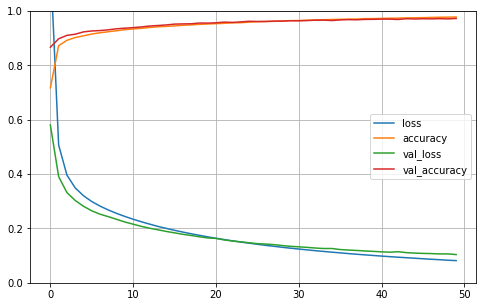

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [51]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9735


[0.08582097291946411, 0.9735000133514404]

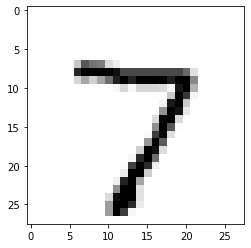

In [52]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [53]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [57]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ]], dtype=float32)

In [58]:
predictions.argmax()

7

In [59]:
model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

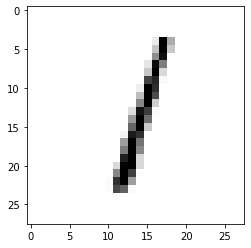

In [62]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [65]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [64]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [68]:
11610/32

362.8125

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9465 - val_loss: 0.5089
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4801 - val_loss: 0.4338
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4228 - val_loss: 0.4148
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4048 - val_loss: 0.3966
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3942 - val_loss: 0.3946
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3879 - val_loss: 0.3865
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3860 - val_loss: 0.3829
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3788 - val_loss: 0.3855
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3759 - val_loss: 0.3902
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3758 - val_loss: 0.3761

In [72]:
8*30 + 30

270

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [73]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3765
0.37653276324272156


In [74]:
y_pred = model.predict(X_test[:5])
y_pred

array([[3.1299431],
       [2.60141  ],
       [1.0800508],
       [0.9726374],
       [1.7719171]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [75]:
model.save("my_keras_model.h5")

In [76]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [77]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3521
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3497
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3465
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3451
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3440
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3422A: 0s - los
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3408
Epoch 9/30
219/363 [=================>............] - ETA: 0s - loss: 0.3336

KeyboardInterrupt: 

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [80]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3196 - val_loss: 0.3466
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3189 - val_loss: 0.3454
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3185 - val_loss: 0.3499
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3199 - val_loss: 0.3597
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3310 - val_loss: 0.3491
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3363 - val_loss: 0.3487
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3239 - val_loss: 0.3462
